# Fully Explore by Python

## 1. Identify the top 5 best-selling games globally.

In [240]:
import pandas as pd

In [242]:
import chardet

with open('PS4_GamesSales.csv', 'rb') as file:
    result = chardet.detect(file.read())
    file_encoding = result['encoding']

data = pd.read_csv('PS4_GamesSales.csv', encoding=file_encoding)

In [243]:
with open('PS4_GamesSales.csv', encoding='utf-8', errors='replace') as file:
    data = pd.read_csv(file)

In [244]:
data = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')

In [248]:
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [252]:
data['Global'].isna().sum()

data = data.dropna(subset=['Global'])

In [254]:
data.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [256]:
top_5_games = data.nlargest(5, 'Global')

top_5_games[['Game', 'Global']]

,Game,Global
0,Grand Theft Auto V,19.39
1,Call of Duty: Black Ops 3,15.09
2,Red Dead Redemption 2,13.94
3,Call of Duty: WWII,13.40
4,FIFA 18,11.80


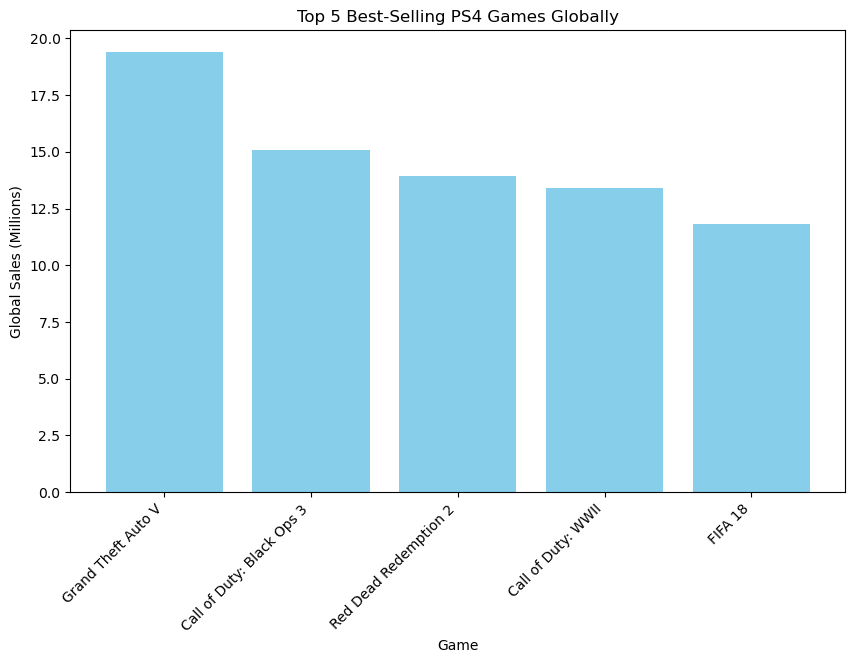

In [258]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5_games['Game'], top_5_games['Global'], color='skyblue')
plt.xlabel('Game')
plt.ylabel('Global Sales (Millions)')
plt.title('Top 5 Best-Selling PS4 Games Globally')
plt.xticks(rotation=45, ha='right')
plt.show()


## 2. Compare regional sales (North America, Europe, Japan, and Rest of the World) for each genre to understand market preferences.

In [261]:
genre_sales = data.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

genre_sales

,North America,Europe,Japan,Rest of World
Genre,,,,
Action,48.15,57.53,10.27,20.76
Action-Adventure,22.30,27.79,1.96,9.83
Adventure,5.27,6.08,1.64,2.23
Fighting,8.58,6.19,1.67,2.98
MMO,1.32,1.45,0.20,0.55
Misc,3.64,6.03,0.96,1.85
Music,2.40,1.62,0.17,0.84
Party,0.09,0.47,0.00,0.10
Platform,5.48,8.92,0.67,2.77


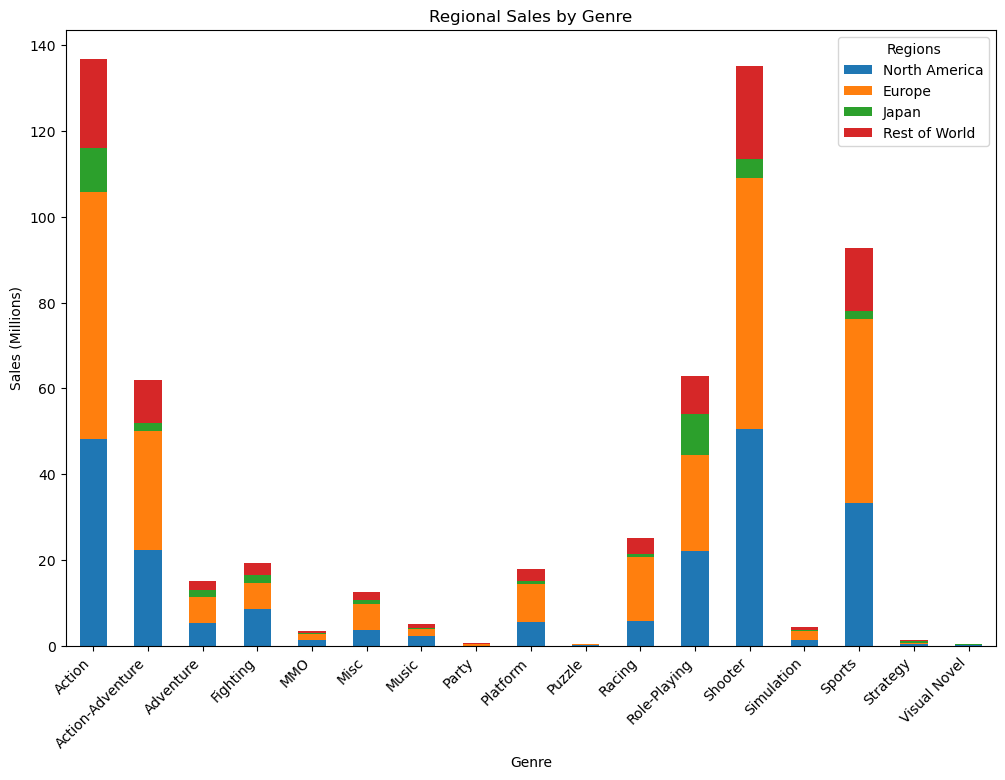

In [263]:
genre_sales.plot(kind='bar', figsize=(12, 8), stacked=True)

plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.title('Regional Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Regions')
plt.show()

In [264]:
genre_sales_percentage = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

genre_sales_percentage

,North America,Europe,Japan,Rest of World
Genre,,,,
Action,35.220540,42.081779,7.512252,15.185429
Action-Adventure,36.037492,44.909502,3.167421,15.885585
Adventure,34.625493,39.947438,10.775296,14.651774
Fighting,44.181256,31.874356,8.599382,15.345005
MMO,37.500000,41.193182,5.681818,15.625000
Misc,29.166667,48.317308,7.692308,14.823718
Music,47.713718,32.206759,3.379722,16.699801
Party,13.636364,71.212121,0.000000,15.151515
Platform,30.717489,50.000000,3.755605,15.526906


## 3. Find the publisher with the highest total global sales.

In [268]:
publisher_sales = data.groupby('Publisher')['Global'].sum()

top_publisher = publisher_sales.nlargest(1)

top_publisher

Publisher
Activision    72.44
Name: Global, dtype: float64

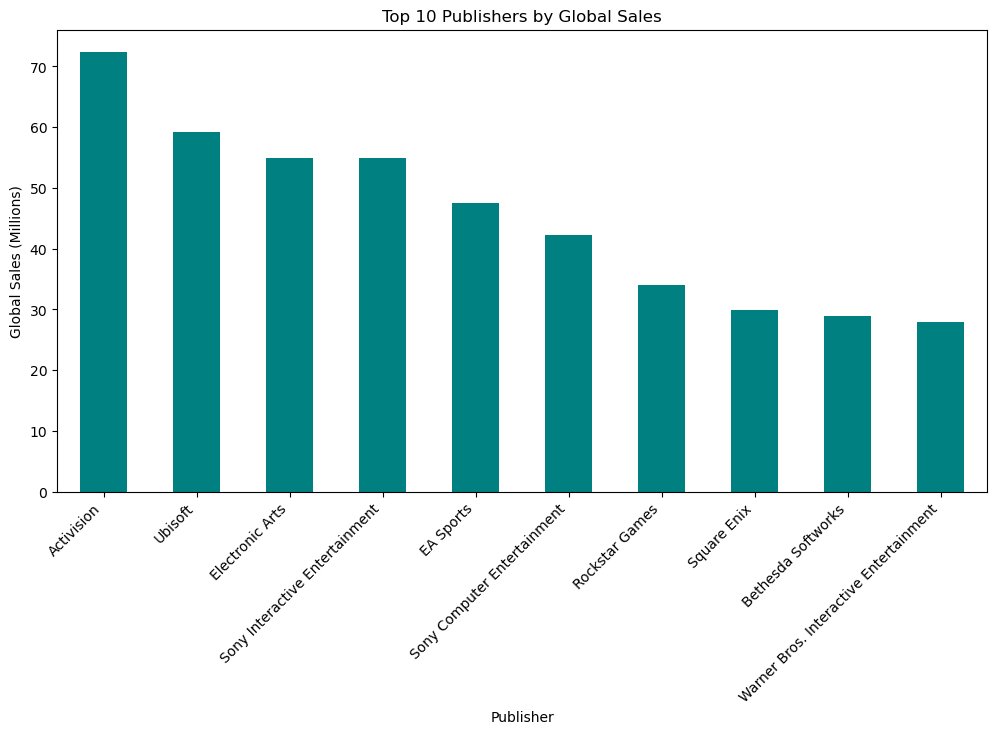

In [269]:
top_publishers = publisher_sales.nlargest(10)

top_publishers.plot(kind='bar', figsize=(12, 6), color='teal')

plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.title('Top 10 Publishers by Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

## 4. Analyze the year with the highest number of game releases.

In [272]:
yearly_game_count = data.groupby('Year')['Game'].count()

year_with_most_releases = yearly_game_count.idxmax()

year_with_most_releases, yearly_game_count[year_with_most_releases]

(2017.0, 254)

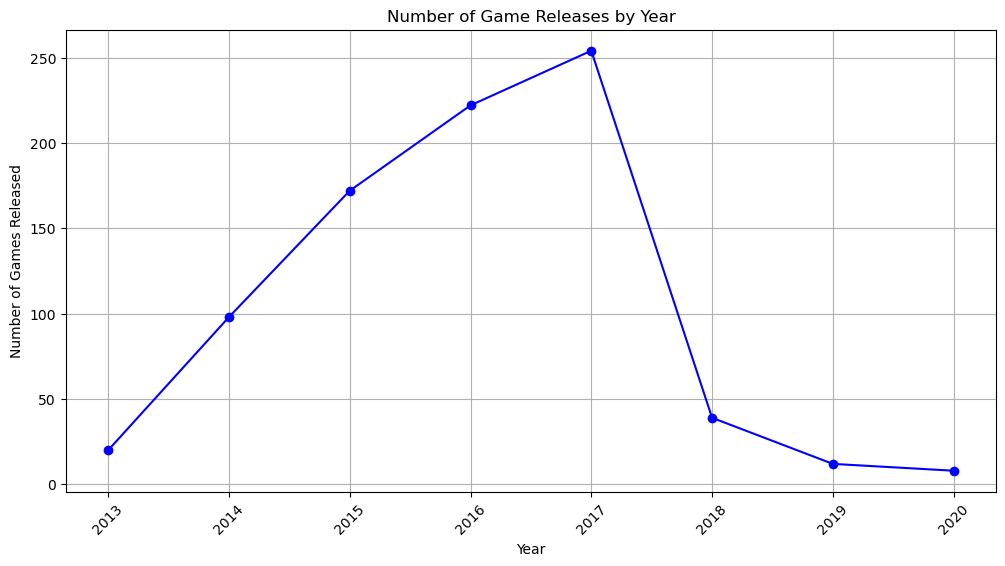

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_game_count.index, yearly_game_count.values, marker='o', color='b')

plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Game Releases by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 5. Determine the most popular genre globally based on total sales.

In [277]:
genre_sales = data.groupby('Genre')['Global'].sum()

most_popular_genre = genre_sales.idxmax()

most_popular_genre, genre_sales[most_popular_genre]

('Action', 136.85)

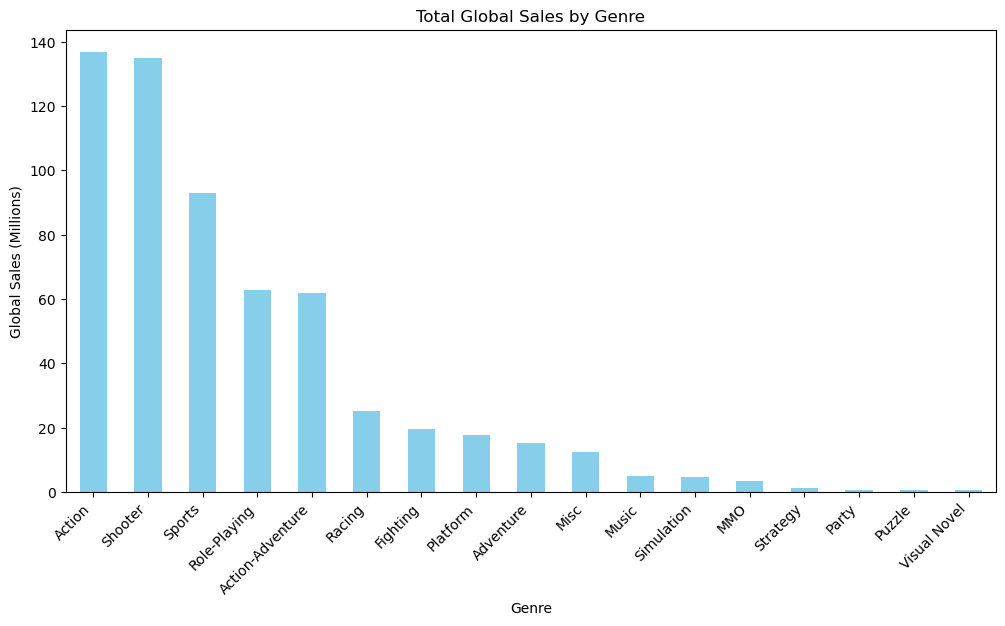

In [279]:
plt.figure(figsize=(12, 6))
genre_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.title('Total Global Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

## 6. Identify the game with the highest sales in Japan compared to other regions.

In [283]:
top_game_japan = data.nlargest(1, 'Japan')

top_game_japan[['Game', 'North America', 'Europe', 'Japan', 'Rest of World']]

,Game,North America,Europe,Japan,Rest of World
24,Monster Hunter: World,1.03,1.06,2.17,0.42


<Figure size 800x600 with 0 Axes>

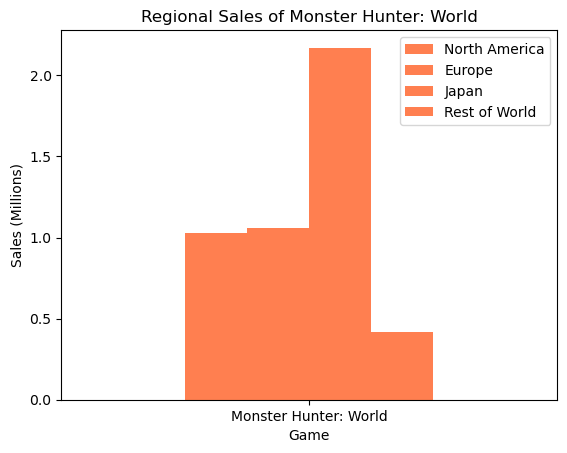

In [285]:
plt.figure(figsize=(8, 6))
top_game_japan.set_index('Game')[['North America', 'Europe', 'Japan', 'Rest of World']].plot(kind='bar', color='coral')

plt.xlabel('Game')
plt.ylabel('Sales (Millions)')
plt.title(f'Regional Sales of {top_game_japan["Game"].values[0]}')
plt.xticks(rotation=0)
plt.show()

## 7. Examine if there is a correlation between sales in North America and Europe.

In [288]:
correlation = data['North America'].corr(data['Europe'])

correlation

0.8159968279353843

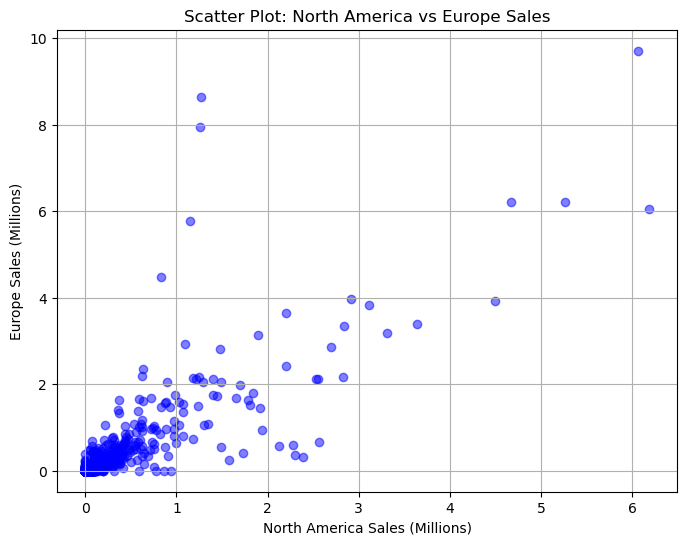

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['North America'], data['Europe'], color='blue', alpha=0.5)

plt.xlabel('North America Sales (Millions)')
plt.ylabel('Europe Sales (Millions)')
plt.title('Scatter Plot: North America vs Europe Sales')
plt.grid(True)
plt.show()

## 8. Compare the sales growth trend for "Action" and "Shooter" genres over the years.

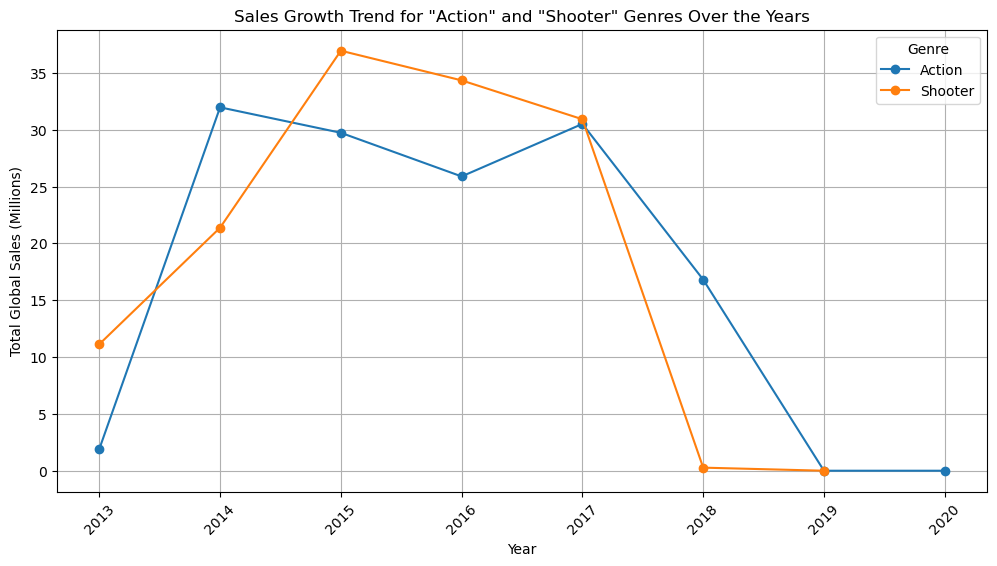

In [293]:
filtered_data = data[data['Genre'].isin(['Action', 'Shooter'])]

genre_yearly_sales = filtered_data.groupby(['Year', 'Genre'])['Global'].sum().unstack()

genre_yearly_sales.plot(kind='line', figsize=(12, 6), marker='o')

plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.title('Sales Growth Trend for "Action" and "Shooter" Genres Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Genre')
plt.show()

## 9. Identify the top publisher in terms of sales for each region.

In [296]:
publisher_sales_by_region = data.groupby('Publisher')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

top_publishers_north_america = publisher_sales_by_region['North America'].idxmax()
top_publishers_europe = publisher_sales_by_region['Europe'].idxmax()
top_publishers_japan = publisher_sales_by_region['Japan'].idxmax()
top_publishers_rest_of_world = publisher_sales_by_region['Rest of World'].idxmax()

top_publishers = {
    'North America': top_publishers_north_america,
    'Europe': top_publishers_europe,
    'Japan': top_publishers_japan,
    'Rest of World': top_publishers_rest_of_world
}

top_publishers

{'North America': 'Activision',
 'Europe': 'Activision',
 'Japan': 'Square Enix',
 'Rest of World': 'Activision'}

In [298]:
top_publishers_sales = {
    'North America': publisher_sales_by_region.loc[top_publishers_north_america, 'North America'],
    'Europe': publisher_sales_by_region.loc[top_publishers_europe, 'Europe'],
    'Japan': publisher_sales_by_region.loc[top_publishers_japan, 'Japan'],
    'Rest of World': publisher_sales_by_region.loc[top_publishers_rest_of_world, 'Rest of World']
}

top_publishers_sales

{'North America': 28.2,
 'Europe': 30.96,
 'Japan': 5.95,
 'Rest of World': 11.709999999999999}

## 10. Visualize the distribution of global sales to identify patterns and outliers.

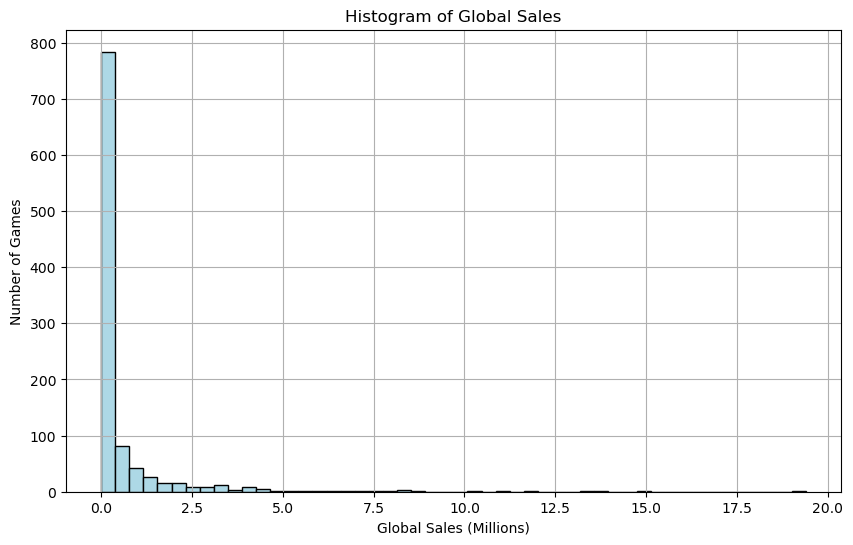

In [301]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Global'], bins=50, color='lightblue', edgecolor='black')

plt.xlabel('Global Sales (Millions)')
plt.ylabel('Number of Games')
plt.title('Histogram of Global Sales')
plt.grid(True)
plt.show()

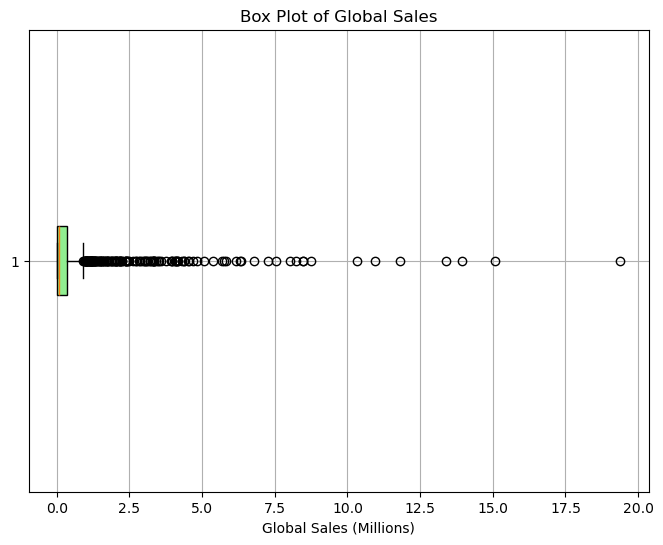

In [302]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Global'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.xlabel('Global Sales (Millions)')
plt.title('Box Plot of Global Sales')
plt.grid(True)
plt.show()

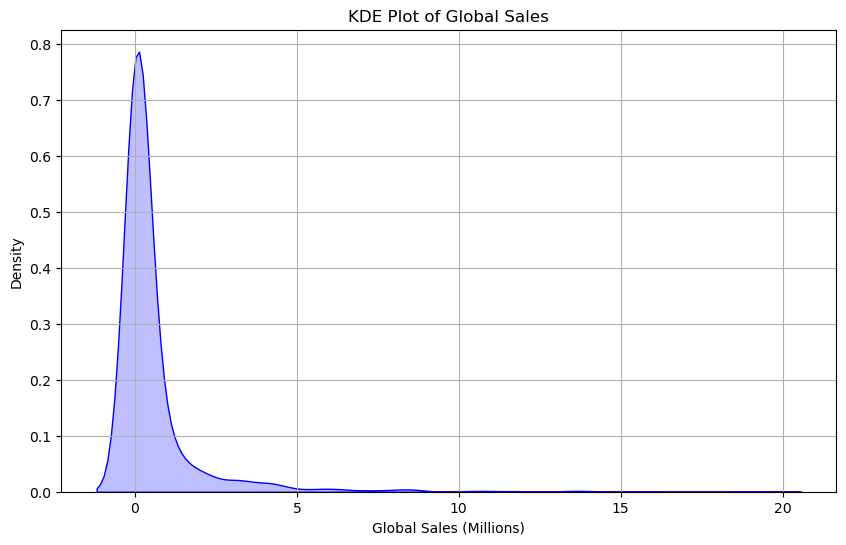

In [304]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Global'], fill=True, color='blue')

plt.xlabel('Global Sales (Millions)')
plt.ylabel('Density')
plt.title('KDE Plot of Global Sales')
plt.grid(True)
plt.show()

## 11. Create visualizations to better understand and communicate data insights:

### ○ Distribution of global sales (Histogram).

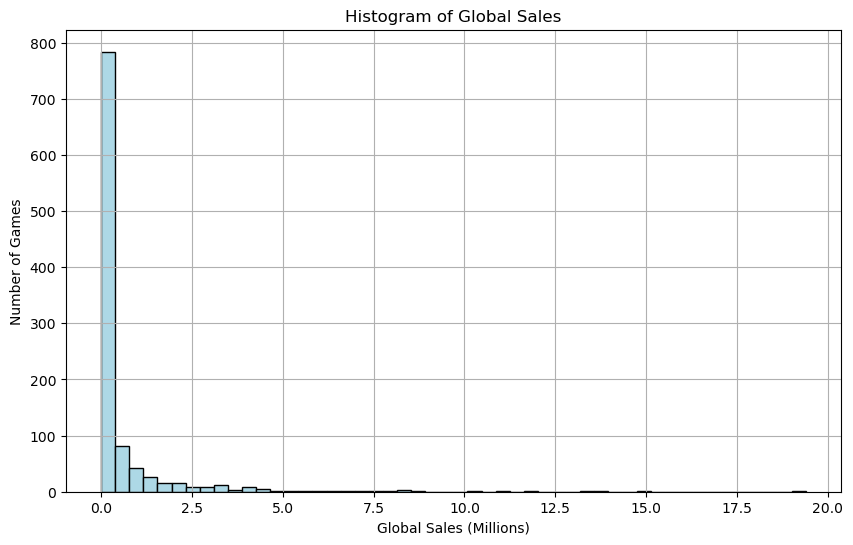

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Global'], bins=50, color='lightblue', edgecolor='black')

plt.xlabel('Global Sales (Millions)')
plt.ylabel('Number of Games')
plt.title('Histogram of Global Sales')
plt.grid(True)
plt.show()

### ○ Total sales comparison for regions (Bar Chart).

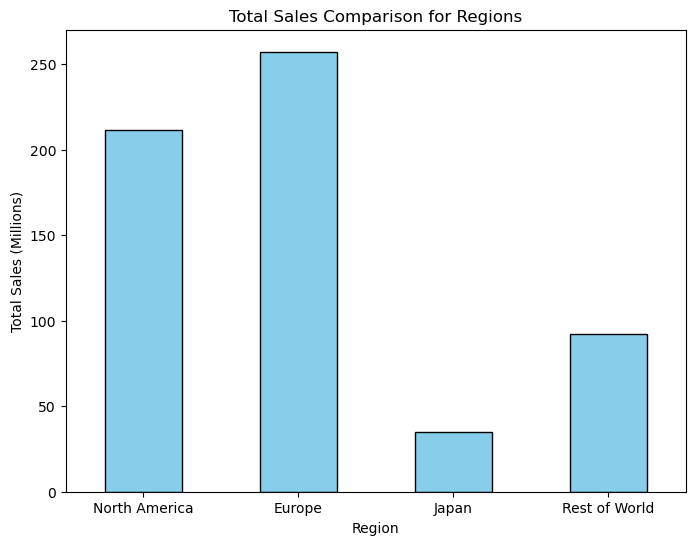

In [312]:
region_sales = data[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales Comparison for Regions')
plt.xticks(rotation=0)
plt.show()

### ○ Share of total global sales by genre (Pie Chart).

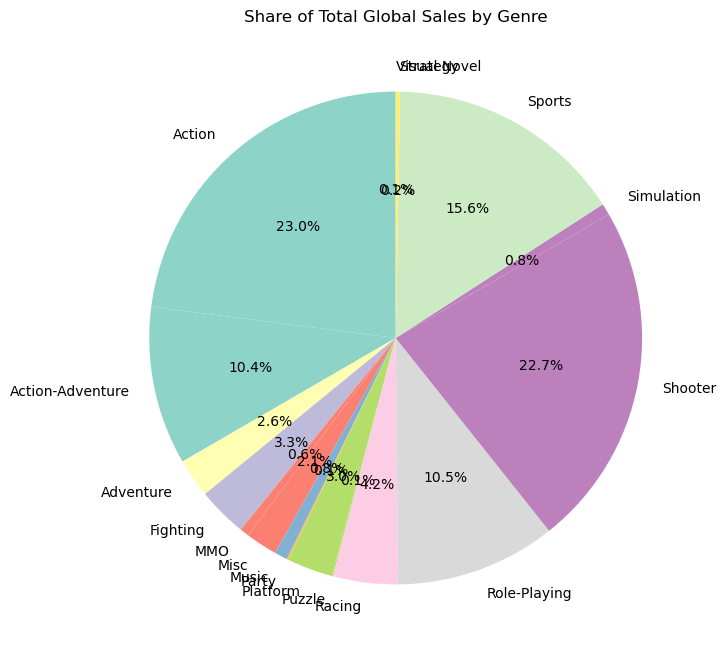

In [315]:
genre_sales = data.groupby('Genre')['Global'].sum()

plt.figure(figsize=(8, 8))
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

plt.title('Share of Total Global Sales by Genre')
plt.ylabel('')
plt.show()

### ○ Trend of global sales over the years (Line Chart).

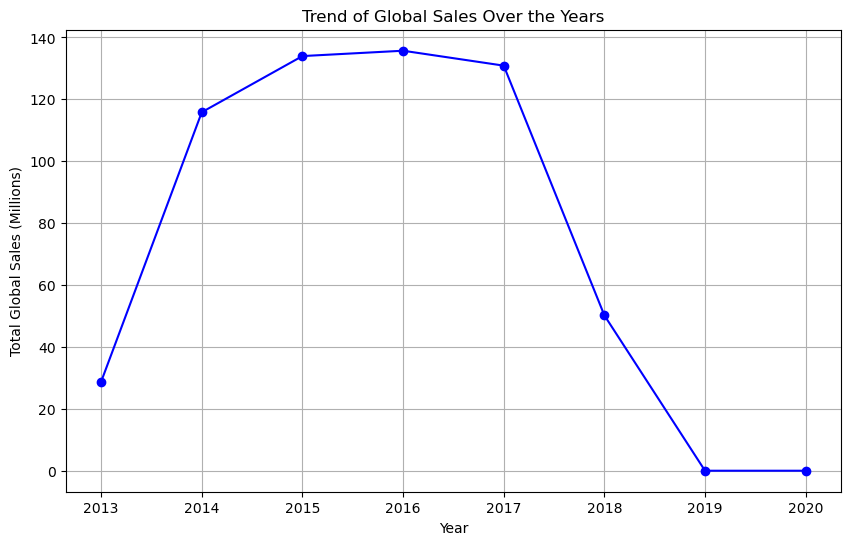

In [318]:
yearly_sales = data.groupby('Year')['Global'].sum()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o', color='blue')

plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.title('Trend of Global Sales Over the Years')
plt.grid(True)
plt.show()

### ○ Top 10 best-selling games globally (Horizontal Bar Chart).

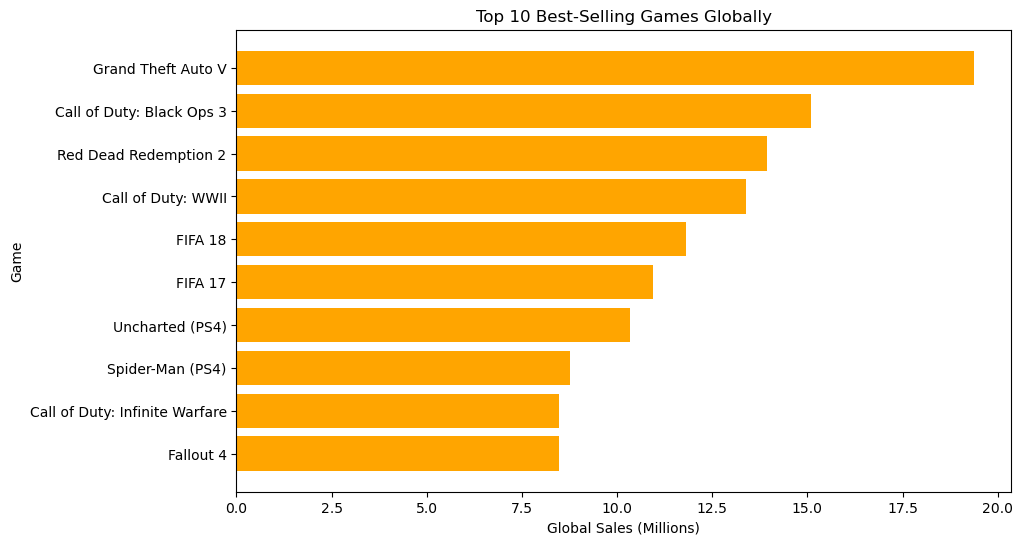

In [321]:
top_10_games = data[['Game', 'Global']].sort_values(by='Global', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_games['Game'], top_10_games['Global'], color='orange')

plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game')
plt.title('Top 10 Best-Selling Games Globally')
plt.gca().invert_yaxis()  # Invert y-axis to have the top game on top
plt.show()

### ○ Correlation between regional sales (Heatmap).

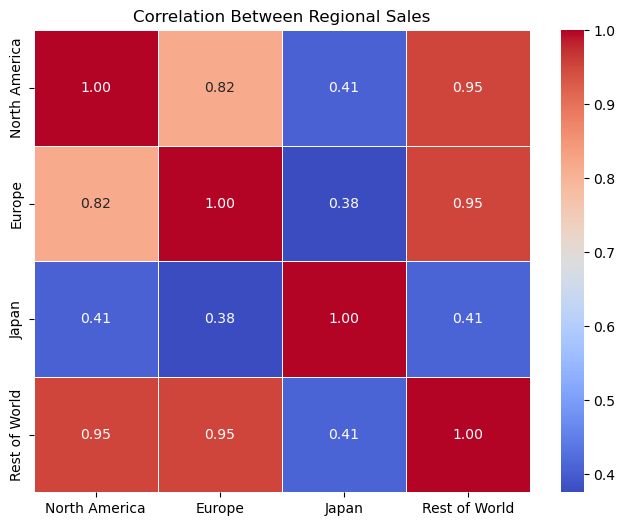

In [324]:
import seaborn as sns

regional_sales = data[['North America', 'Europe', 'Japan', 'Rest of World']]

correlation_matrix = regional_sales.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Between Regional Sales')
plt.show()

### ○ Contribution of each genre to regional sales (Stacked Bar Chart).

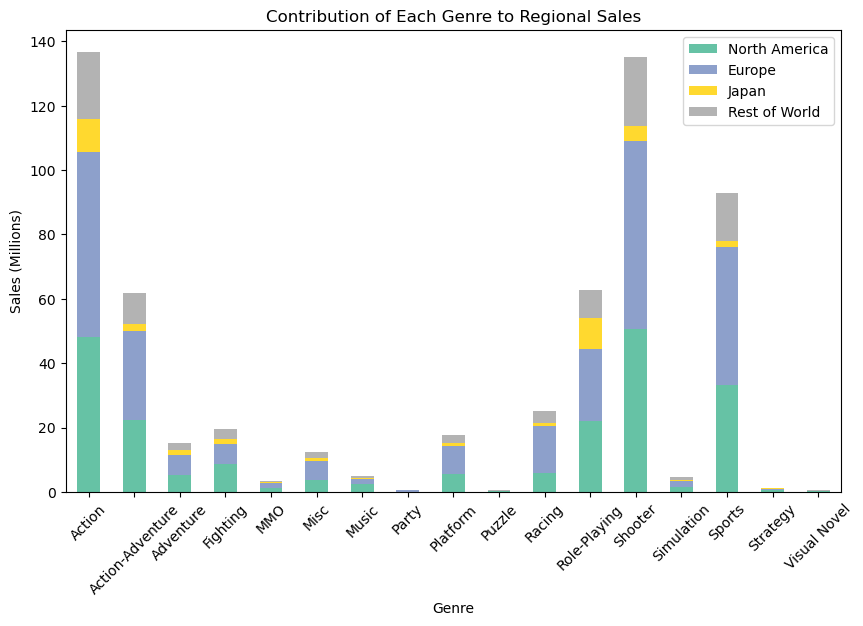

In [327]:
genre_region_sales = data.groupby(['Genre'])[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

genre_region_sales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.title('Contribution of Each Genre to Regional Sales')
plt.xticks(rotation=45)
plt.show()

# What Did You Learn from Analyzing the Data?

### 1. What insights or patterns did you discover during your analysis?

After analyzing the PS4 game sales data, the following key insights emerged:

1. **Best-Selling Games:** Popular franchises like Grand Theft Auto V and Call of Duty consistently topped global sales, indicating a strong and loyal fanbase for certain titles.

2. **Regional Sales Patterns:** Sales varied across regions, with Japan favoring local games, while North America and Europe preferred global blockbusters.

3. **Publisher Performance:** Top publishers like Electronic Arts and Activision Blizzard performed well across regions, showing their ability to create universally appealing games.

4. **Popular Genres:** Action and shooter genres dominated globally, with sports and RPGs performing well in specific regions.

5. **Sales Trends:** Global sales grew around major console releases but showed signs of plateauing in recent years, indicating market saturation.

6. **Correlation Between Regions:** North America and Europe showed strong sales correlation, while Japan had distinct preferences.

7. **Outliers:** A few games had exceptionally high sales, highlighting the importance of mega-hits in driving the majority of revenue.

In short, the analysis reveals regional preferences, the dominance of a few big franchises, and the importance of genre targeting and strategic marketing for sustained success in the gaming market.

### 2. Did anything in the data surprise you? If yes, what was it?

Yes, a few things were surprising:

1. **Regional Differences:** Games that were popular in North America and Europe didn't perform as well in Japan, where local games dominated.

2. **Sales Outliers:** A few games had extremely high sales, making up a large portion of global sales, highlighting how a few blockbusters drive most of the revenue.

3. **Genre Consistency:** Action and shooter genres remained popular across all regions and years, showing their lasting appeal.

These insights emphasize the impact of regional preferences and the dominance of a few successful games.

### 3. What challenges did you face, and how did you overcome them?

The main challenges were:

1. **Data Cleaning:** Handled missing values and corrected data types to make the dataset usable.
    
2. **Encoding Errors:** Resolved by using different file encodings like 'ISO-8859-1'.
    
3. **Large Data:** Filtered key columns and used efficient pandas functions for better performance.
                                                                       
4. **Complex Visualizations:** Improved visualizations by adjusting parameters and using suitable chart types.
                                                                       
These steps helped overcome the issues and allowed for effective analysis.

### 4. How do you think data analysis can help in making real-world decisions?

Data analysis helps in real-world decision-making by providing:

1. **Informed Decisions:** Based on facts and data, not intuition.

2. **Predictive Insights:** Anticipating future trends and behaviors.

3. **Improved Efficiency:** Identifying and eliminating process inefficiencies.

4. **Risk Management:** Predicting risks and making informed choices.

5. **Personalization:** Tailoring products and marketing to customer preferences.

In short, data analysis enables better, more strategic decision-making across various industries.

### 5. What skills or knowledge do you feel you have improved during this project?"

During this project, I improved:

1. **Data Cleaning:** Handling missing values and correcting data types.

2. **Data Analysis:** Using pandas for data manipulation and aggregation.

3. **Data Visualization:** Creating effective charts with Matplotlib and Seaborn.

4. **Statistical Analysis:** Identifying patterns and trends in the data.

5. **Problem-Solving:** Overcoming errors and unexpected results during analysis.

Overall, I strengthened my data analysis, coding, and visualization skills.